In [2]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats

In [3]:
sys.path.append('../AppStat2023/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

plt.rcParams['font.size'] = 16 # set some basic plotting parameters

In [4]:
T_data = np.genfromtxt("T_Emilie.dat")

n = T_data[:,0]
time = T_data[:,1]

In [5]:
def period(N, T, time0):
    return N * T + time0

In [6]:
chi2fit = Chi2Regression(period, n, time, np.ones(27))

minuit_chi2 = Minuit(chi2fit, T=0, time0=0)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()  

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.04306                    │              Nfcn = 40               │
│ EDM = 1e-20 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ T     │   2.720   │   0.025   │            │            │         │         │       │
│ 1 │ time0 │    2.2    │    0.4    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │        T    time0 │
├───────┼───────────────────┤
│     T │ 0.000611  -8.5e-3 │
│ time0 │  -8.5e-3    0.157 │
└───────┴───────────────────┘

In [7]:
T_fit = minuit_chi2.values[:]

for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.2f} +/- {error:.2f}")

chi2_value = minuit_chi2.fval
Ndof = len(time) - 2

Prob_value = stats.chi2.sf(chi2_value, Ndof)
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")

Fit value: T = 2.72 +/- 0.02
Fit value: time0 = 2.18 +/- 0.40
Chi2 value: 0.0   Ndof = 25    Prob(Chi2,Ndof) = 1.000


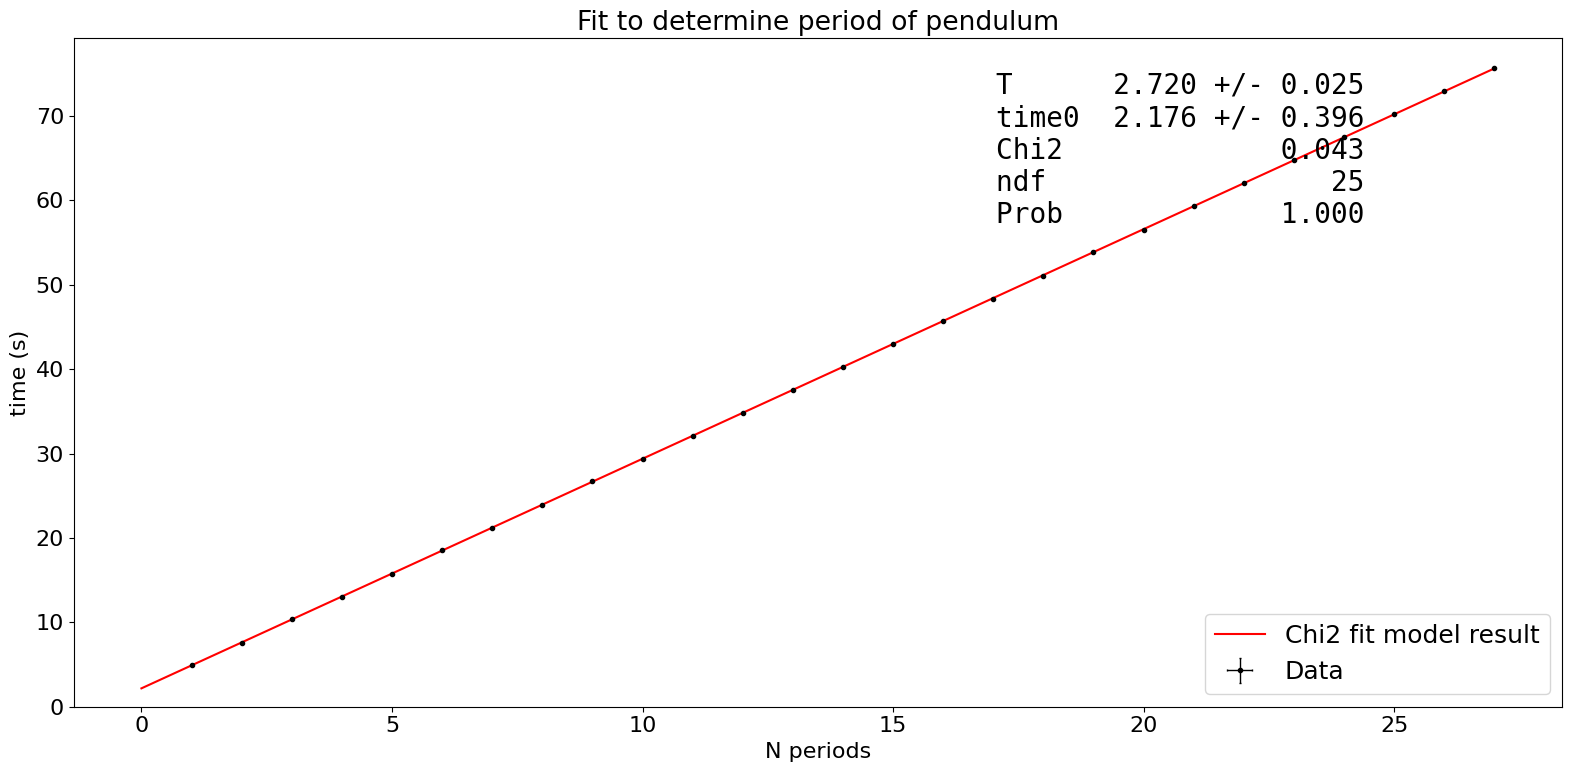

In [8]:
# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(n, time, yerr=0.0, xerr=0.0, label='Data', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="N periods", # the label of the y axis
       ylabel="time (s)",  # the label of the y axis
       title="Fit to determine period of pendulum", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(0, 27, 1000)
ax.plot(x_axis, period(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'T':   [minuit_chi2.values['T'], minuit_chi2.errors['T']],
     'time0':   [minuit_chi2.values['time0'], minuit_chi2.errors['time0']],
     'Chi2':     chi2_value,
     'ndf':      Ndof,
     'Prob':     Prob_value,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.
fig.tight_layout()

0.039932970296530416


Text(0, 0.5, 'counts')

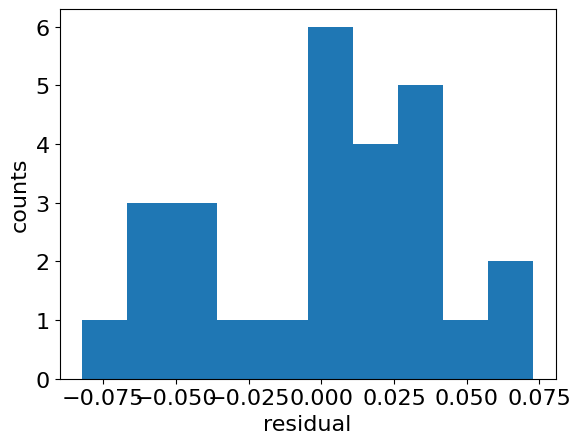

In [9]:
res = time - period(n, *minuit_chi2.values[:])
plt.hist(res, bins=10)

sigma_time = np.std(res)
print(sigma_time)
plt.xlabel("residual")
plt.ylabel("counts")

In [10]:
chi2fit_new = Chi2Regression(period, n, time, np.ones(len(n))*sigma_time)

minuit_chi2_new = Minuit(chi2fit_new, T=0, time0=0)
minuit_chi2_new.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2_new.migrad()  

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27                         │              Nfcn = 42               │
│ EDM = 5.64e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ T     │  2.7205   │  0.0010   │            │            │         │         │       │
│ 1 │ time0 │   2.176   │   0.016   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │        T    time0 │
├───────┼───────────────────┤
│     T │ 9.74e-07 -13.6e-6 │
│ time0 │ -13.6e-6  0.00025 │
└───────┴───────────────────┘

In [11]:
T_fit_new = minuit_chi2.values[:]

for name in minuit_chi2.parameters :
    value, error = minuit_chi2_new.values[name], minuit_chi2_new.errors[name]
    print(f"Fit value: {name} = {value:.3f} +/- {error:.3f}")

chi2_value_new = minuit_chi2_new.fval
Ndof = len(time) - 2

Prob_value_new = stats.chi2.sf(chi2_value_new, Ndof)
print(f"Chi2 value: {chi2_value_new:.1f}   Ndof = {Ndof:.0f}    Prob(Chi2,Ndof) = {Prob_value_new:5.3f}")

Fit value: T = 2.720 +/- 0.001
Fit value: time0 = 2.176 +/- 0.016
Chi2 value: 27.0   Ndof = 25    Prob(Chi2,Ndof) = 0.356


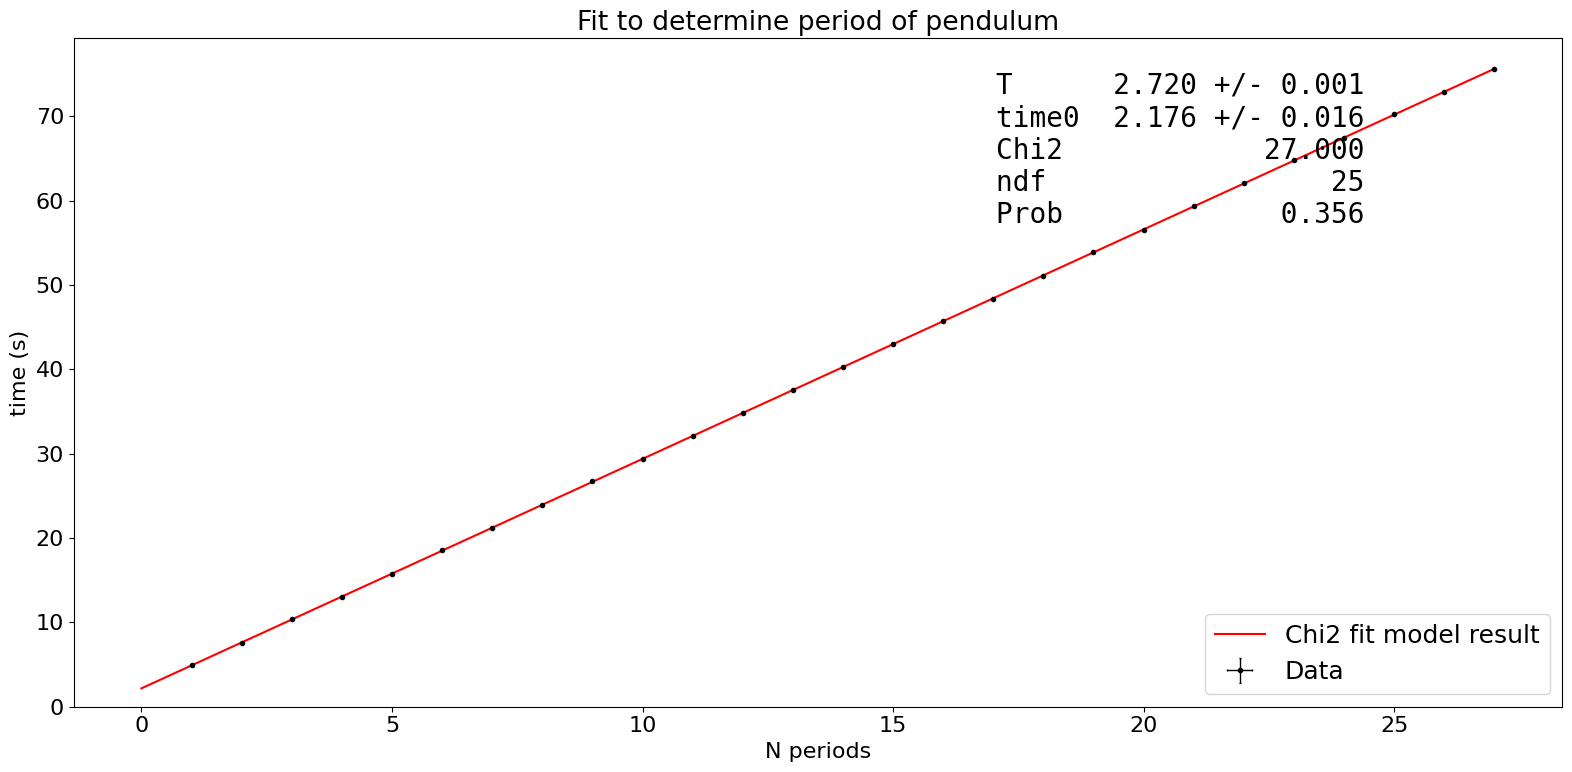

In [12]:
# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(n, time, yerr=sigma_time, xerr=0.0, label='Data', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="N periods", # the label of the y axis
       ylabel="time (s)",  # the label of the y axis
       title="Fit to determine period of pendulum", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(0, 27, 1000)
ax.plot(x_axis, period(x_axis, *minuit_chi2_new.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'T':   [minuit_chi2_new.values['T'], minuit_chi2_new.errors['T']],
     'time0':   [minuit_chi2_new.values['time0'], minuit_chi2_new.errors['time0']],
     'Chi2':     chi2_value_new,
     'ndf':      Ndof,
     'Prob':     Prob_value_new,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.
fig.tight_layout()